In [1]:
# Data and Math
import numpy as np
import pandas as pd
import math
import statsmodels.api as sm

from pandas import Series, DataFrame

# Machine Learning library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Checklist
import markdown
html = markdown.markdown(source, extensions=['markdown_checklist.extension'])

The source of data:

In [2]:
print(sm.datasets.fair.SOURCE)


Fair, Ray. 1978. "A Theory of Extramarital Affairs," `Journal of Political
Economy`, February, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm



Description of the dataset:

In [3]:
print(sm.datasets.fair.DESCRLONG)

Extramarital affair data used to explain the allocation
of an individual's time among work, time spent with a spouse, and time
spent with a paramour. The data is used as an example of regression
with censored data.


Based on the data [sourcepage on statmodels website](https://www.statsmodels.org/stable/datasets/generated/fair.html), there are 6366 observations and 9 variables, the variable definitions are as follows:

In [4]:
print(sm.datasets.fair.NOTE)

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
          

There is only a note on the values of affairs. Based on the [original article](https://fairmodel.econ.yale.edu/rayfair/pdf/1978a200.pdf), the value of the affairs which show the spent time in extramarital affairs, is equivalent to $0$ or $\frac{q_1q_2}{v_3}$, where  
$q_1$ states if scince marriage have had sexual with man other than husband, with how many different men:  
> $q_1$: 1.0 = 1, 3.5 = 2-5, 8.0 = 6-10, and 12 = more than 10.  

$q_2$ states approximate number of times had sexual relations whit each man
> $q_2$: 1.0 = once, 3.5 = 2-5, 8.0 = 6-10, 12 = more than 10, and 5.6 = it varied greatly from partner to partner.  

and  
> $v_3$: the number of years married.

### Load data as panda object

In [5]:
# Load data as dataframe
df = sm.datasets.fair.load_pandas().data

In [6]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [7]:
# Create check function
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

# Apply to DataFrame
df['had_affair'] = df['affairs'].apply(affair_check)

In [8]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


<AxesSubplot:xlabel='age', ylabel='Count'>

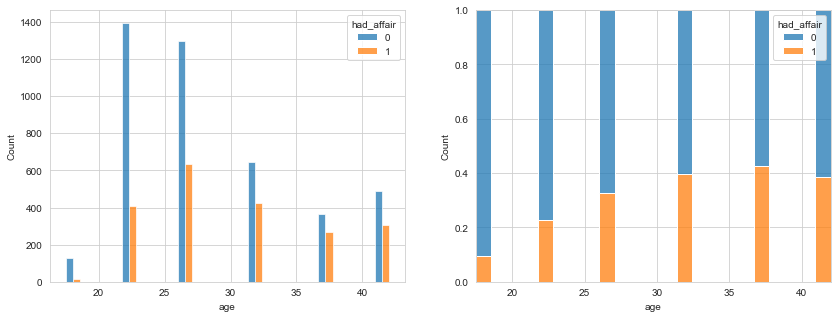

In [37]:
f, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(data=df, x='age', hue='had_affair', multiple='dodge', ax=axes[0])
sns.histplot(data=df, x='age', hue='had_affair', multiple='fill' , ax=axes[1])

The above left plot shows the counts of having extramarital affairs (EA) by age. The right one is the percentage in respect to the sample population of each case (here age). So definitely, it is more releiable and gives a better insight of the effect of the parameter.  

Therefore, from now on I will continue with the normalized percentage one.

<AxesSubplot:xlabel='occupation_husb', ylabel='Count'>

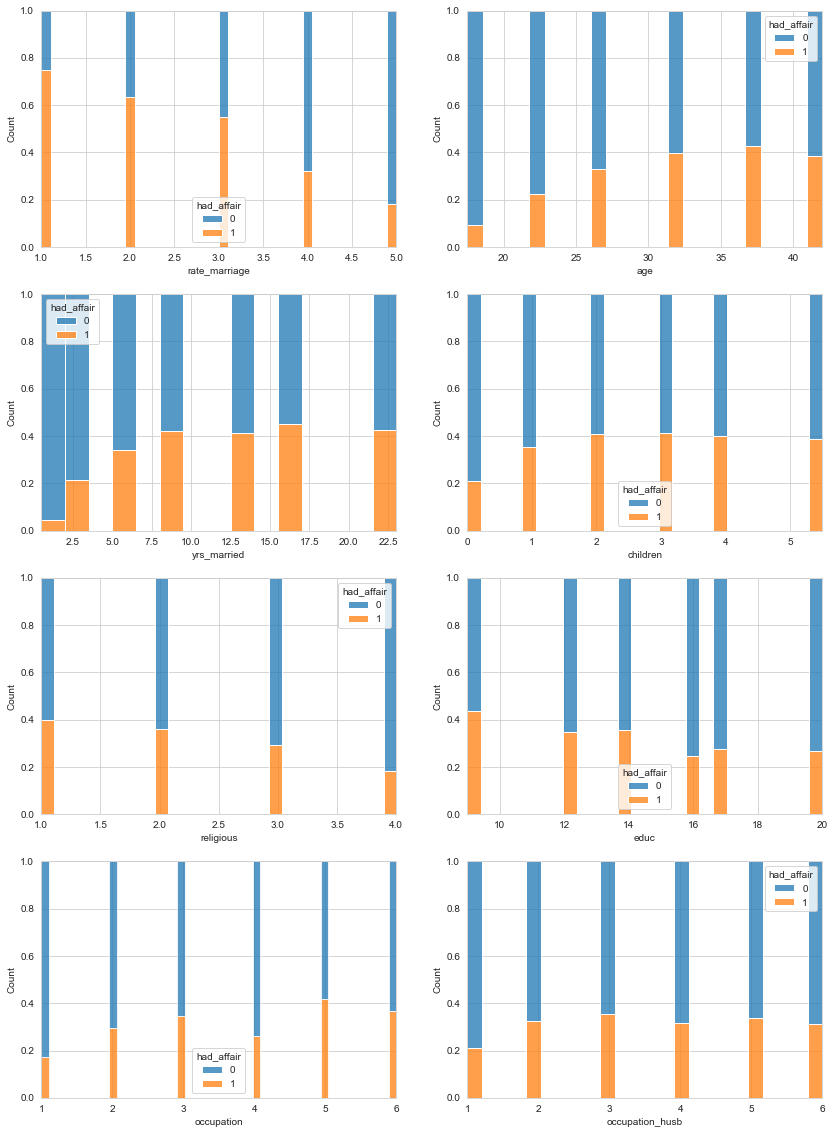

In [47]:
f, axes = plt.subplots(4, 2, figsize=(14, 20))
sns.histplot(data=df, x='rate_marriage', hue='had_affair', multiple='fill', ax=axes[0,0])
sns.histplot(data=df, x='age', hue='had_affair', multiple='fill', ax=axes[0,1])
sns.histplot(data=df, x='yrs_married', hue='had_affair', multiple='fill', ax=axes[1,0])
sns.histplot(data=df, x='children', hue='had_affair', multiple='fill', ax=axes[1,1])
sns.histplot(data=df, x='religious', hue='had_affair', multiple='fill', ax=axes[2,0])
sns.histplot(data=df, x='educ', hue='had_affair', multiple='fill', ax=axes[2,1])
sns.histplot(data=df, x='occupation', hue='had_affair', multiple='fill', ax=axes[3,0])
sns.histplot(data=df, x='occupation_husb', hue='had_affair', multiple='fill', ax=axes[3,1])


Based on the above diagrams we can conclude:
- The likely of EA, decreases by increasing how they rate their marriage. Which definitely reasonable. 
- The likely of EA, interestingly, increases by increasing age, years of marriage and this is why it is also correlates with the number of children, which normally increases by time. __It would be interesting if one can find a way to check which one is the main one, the years after marriage or the age__.
- Religious cause reduction in EA. Education also but not as strong as religious.
- Interestingly, the occupation of the wife has a small effect in EA, maybe due to more extra family connection. However, this is not the case for the occupation of husband.

If one want to sort based on the effect:
- Happiness of marriage
- Age or years of marriage
- Religious
- Education
- Wife occupation

In [42]:
axes.shape

(4, 2)

### Todo List



* [ ] Find a way to check that which of the age either years after marriage has a greater role in EA.